In [1]:
!nvidia-smi


Wed May 15 13:06:38 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install roboflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.

In [3]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/78.2 GB disk)


In [4]:

from roboflow import Roboflow
rf = Roboflow(api_key="uhrpY7vYVAtQ6Of79idJ")
project = rf.workspace("mrkbil-projects").project("fabric-defect-dataset")
version = project.version(1)
dataset = version.download("yolov8-obb")






loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fabric-Defect-Dataset-1 in yolov8-obb:: 100%|██████████| 4948/4948 [00:01<00:00, 3275.91it/s]


In [5]:
print(dataset.location)

/content/Fabric-Defect-Dataset-1


In [6]:
!yolo task=detect mode=train model=yolov8n-obb.pt data={dataset.location}/data.yaml epochs=30 imgsz=640 batch=32

100% 6.24M/6.24M [00:00<00:00, 273MB/s]
WARNING ⚠️ conflicting 'task=detect' passed with 'task=obb' model. Ignoring 'task=detect' and updating to 'task=obb' to match model.
Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=obb, mode=train, model=yolov8n-obb.pt, data=/content/Fabric-Defect-Dataset-1/data.yaml, epochs=30, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=Fal

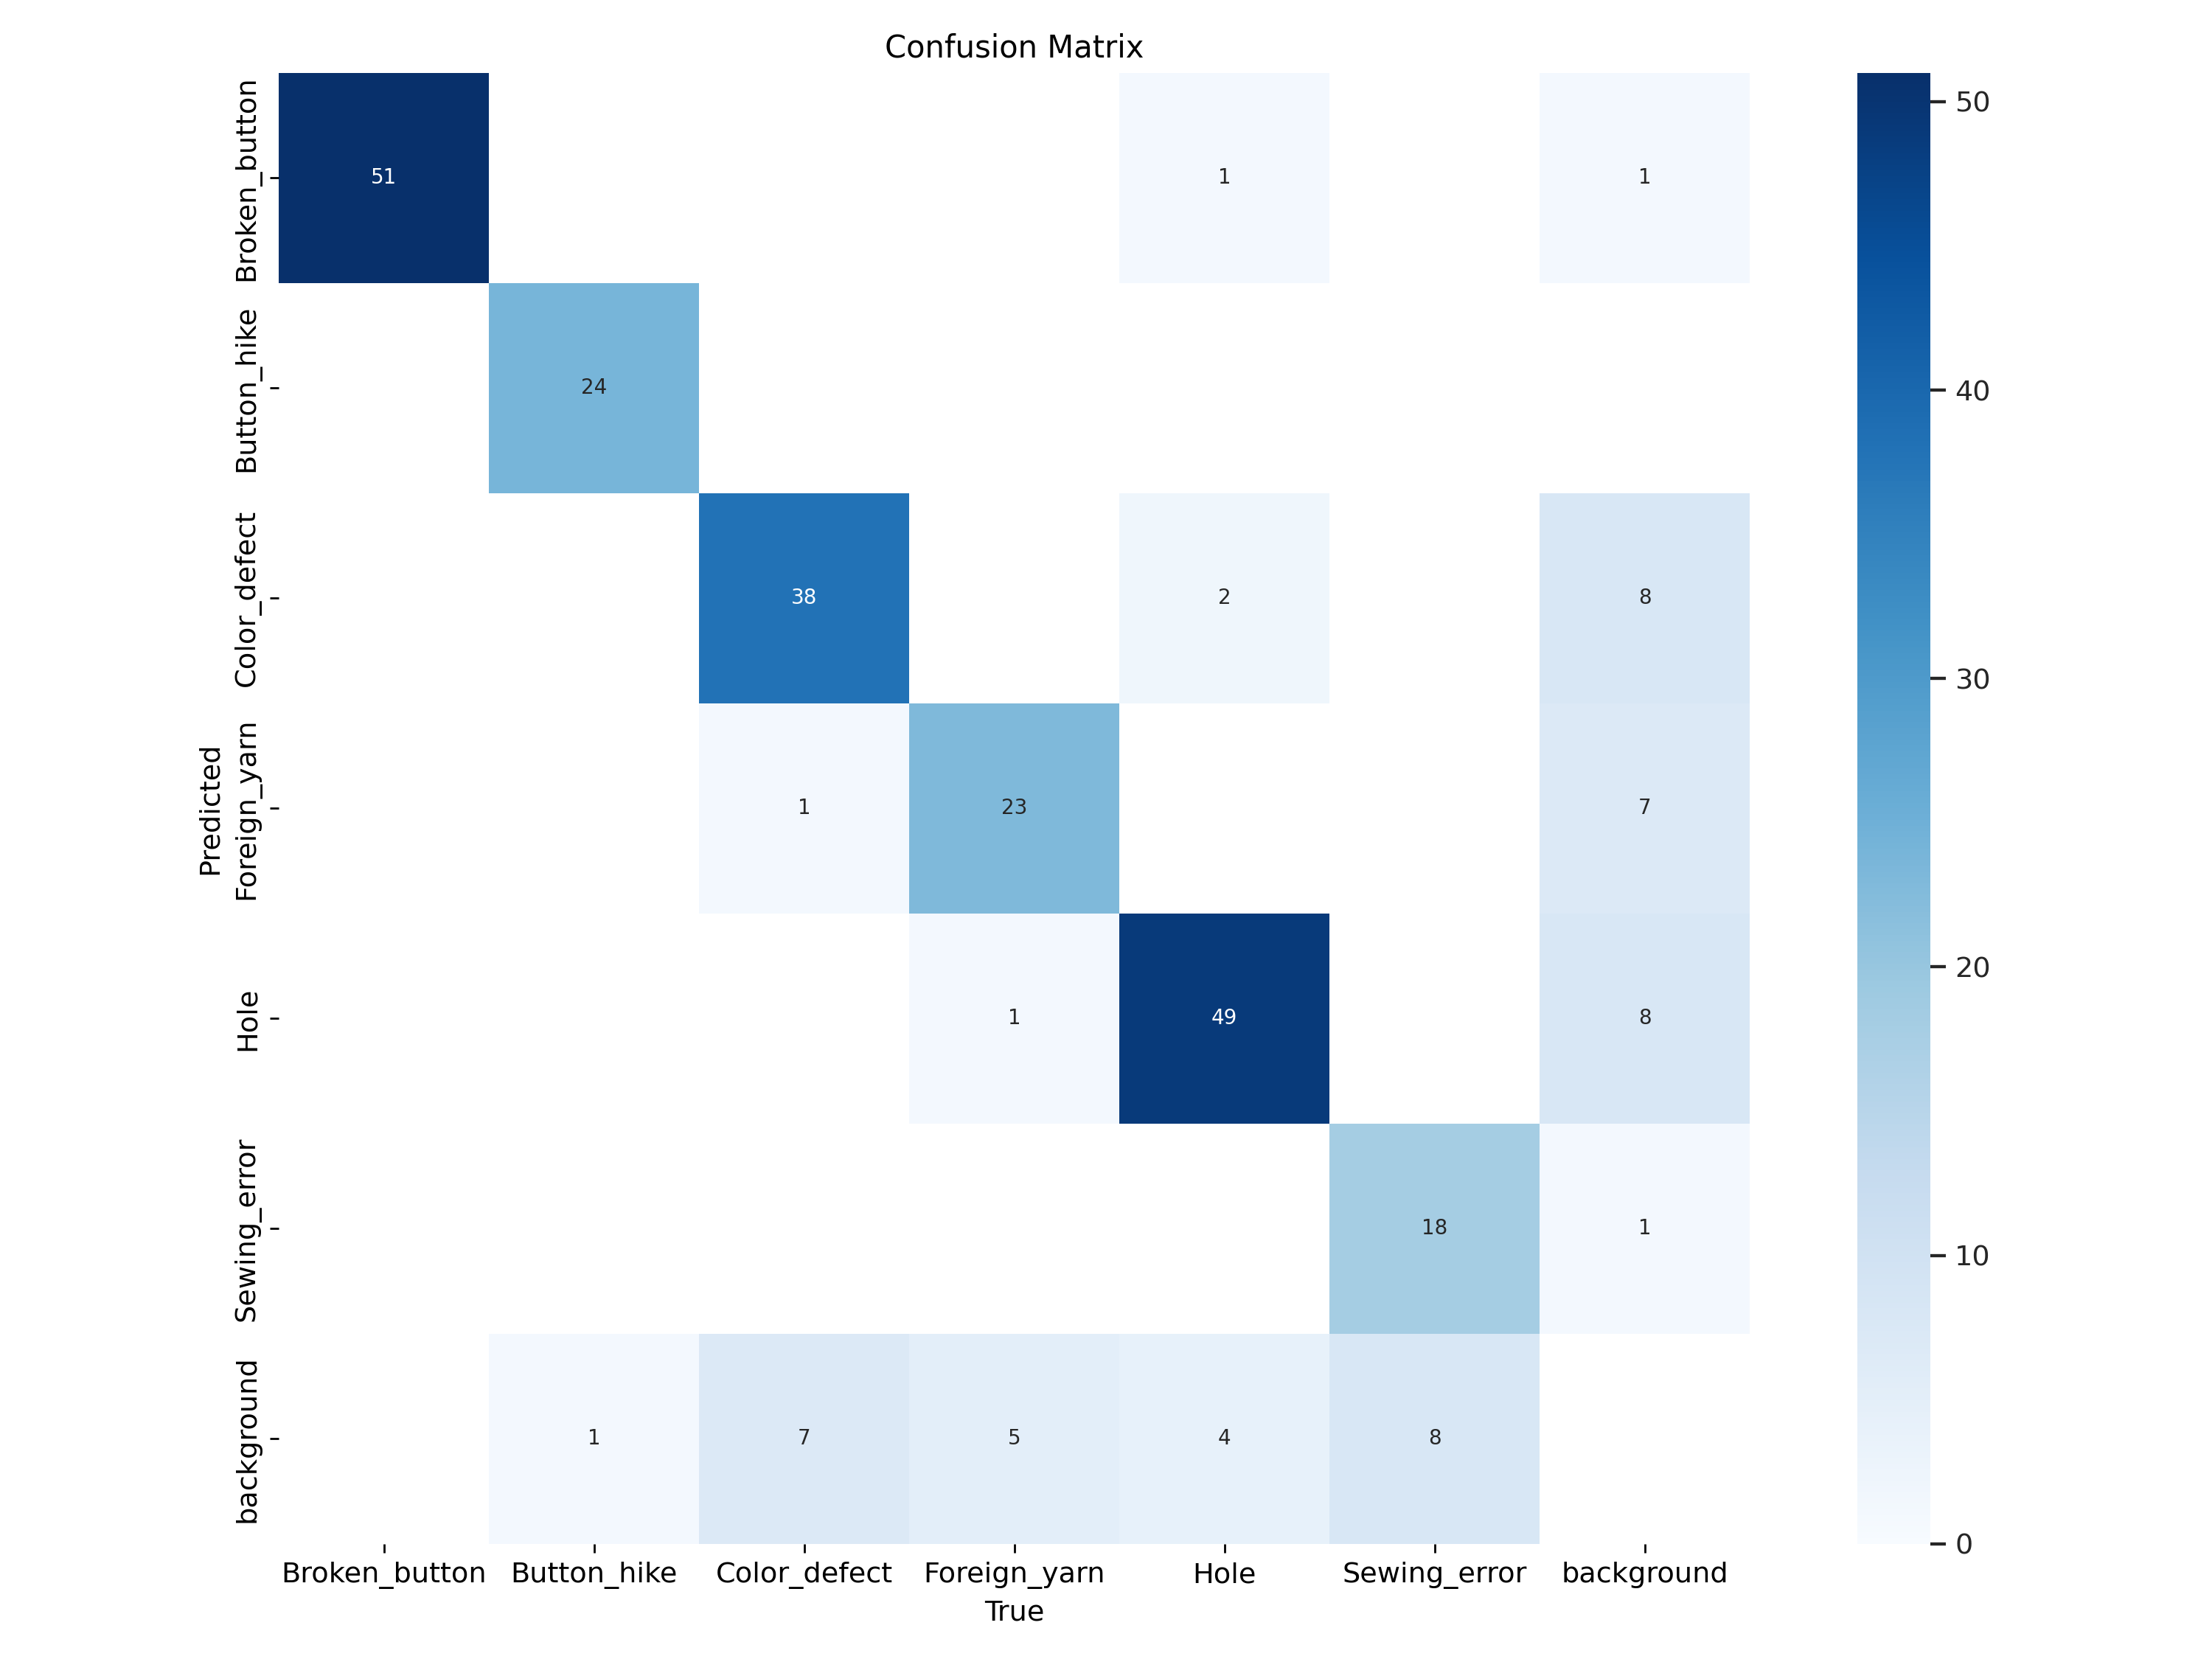

In [7]:
from IPython.display import Image
Image(filename='/content/runs/obb/train/confusion_matrix.png', width=512)


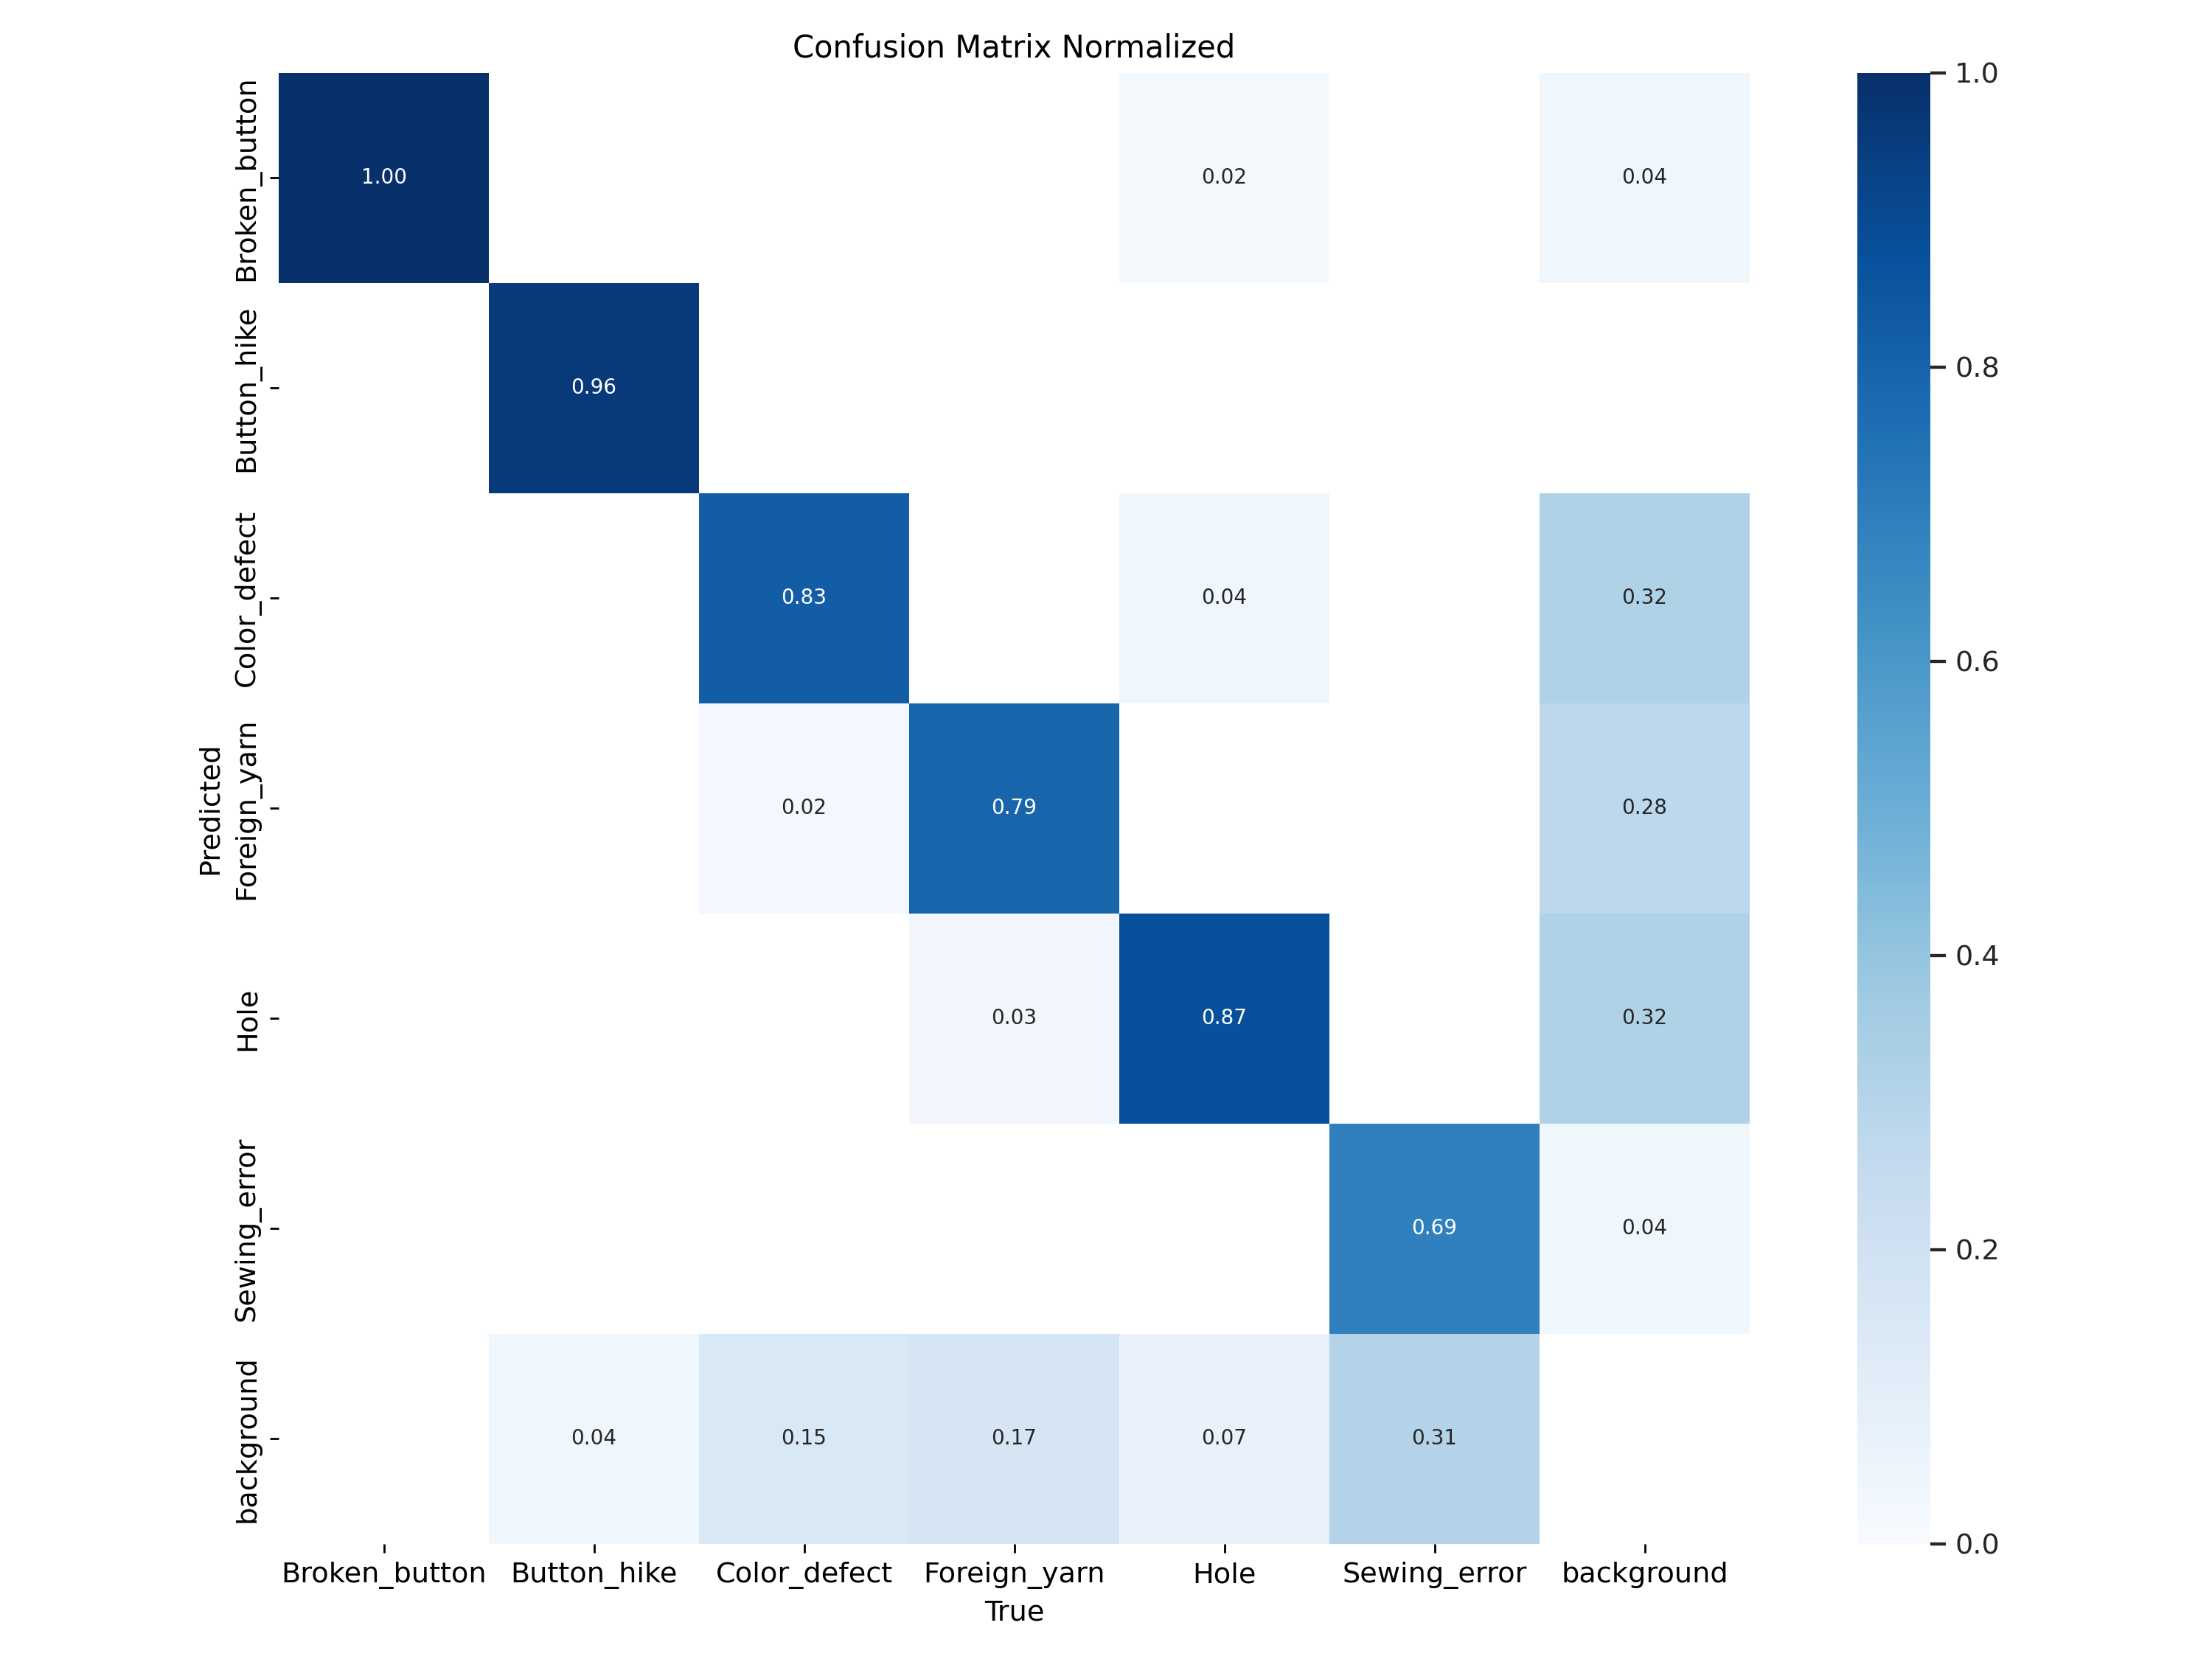

In [8]:
from IPython.display import Image
Image(filename='/content/runs/obb/train/confusion_matrix_normalized.png', width=512)

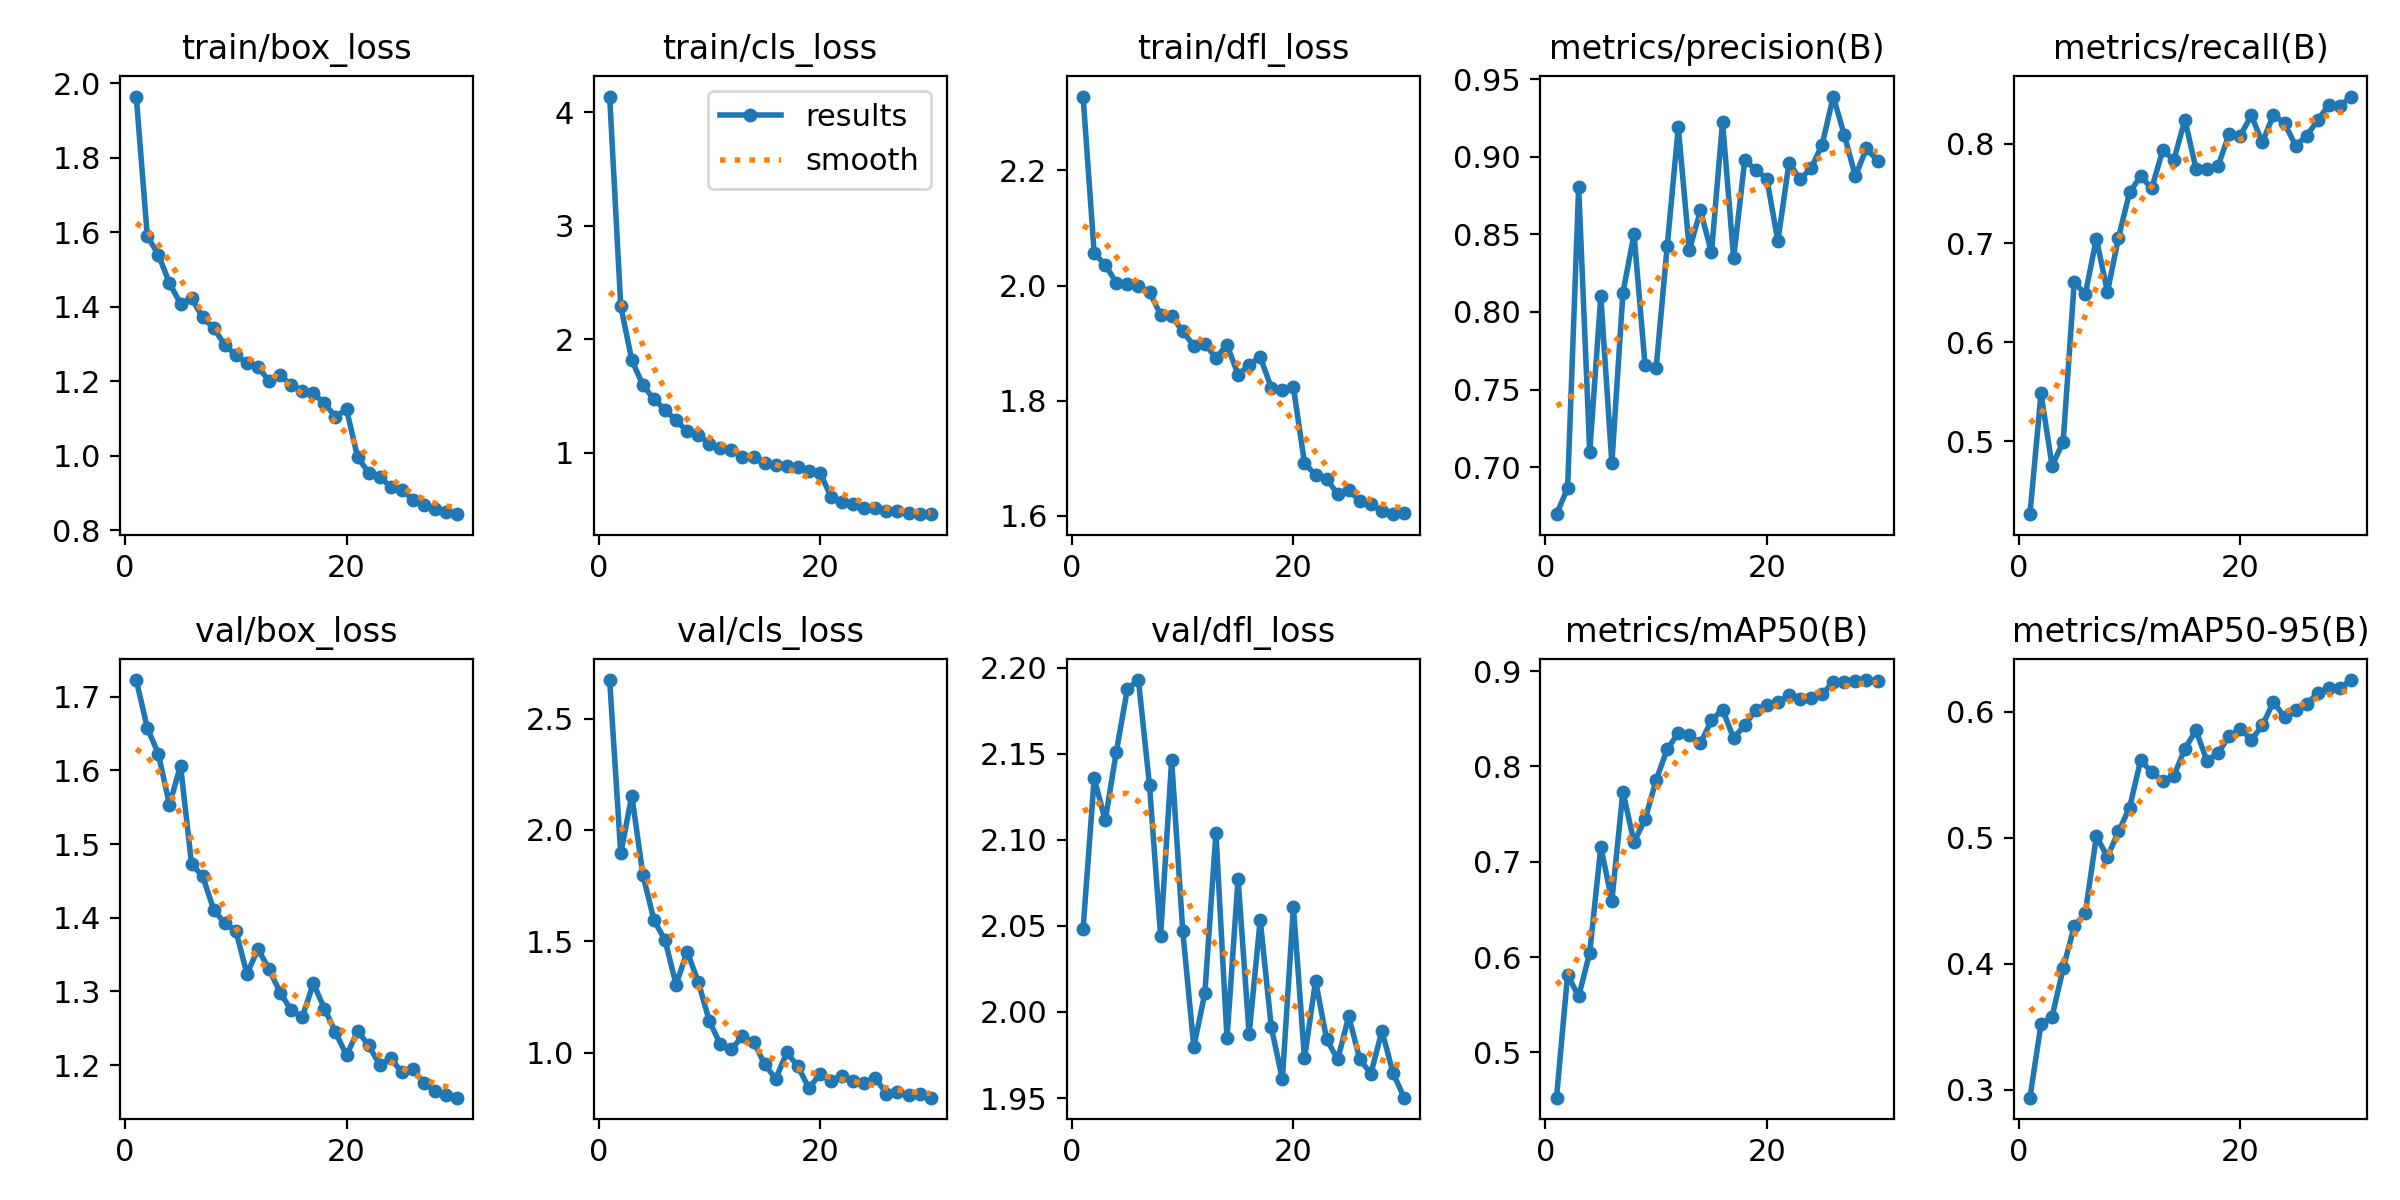

In [9]:
image_path = "/content/runs/obb/train/results.png"
Image(filename=image_path, width=600)

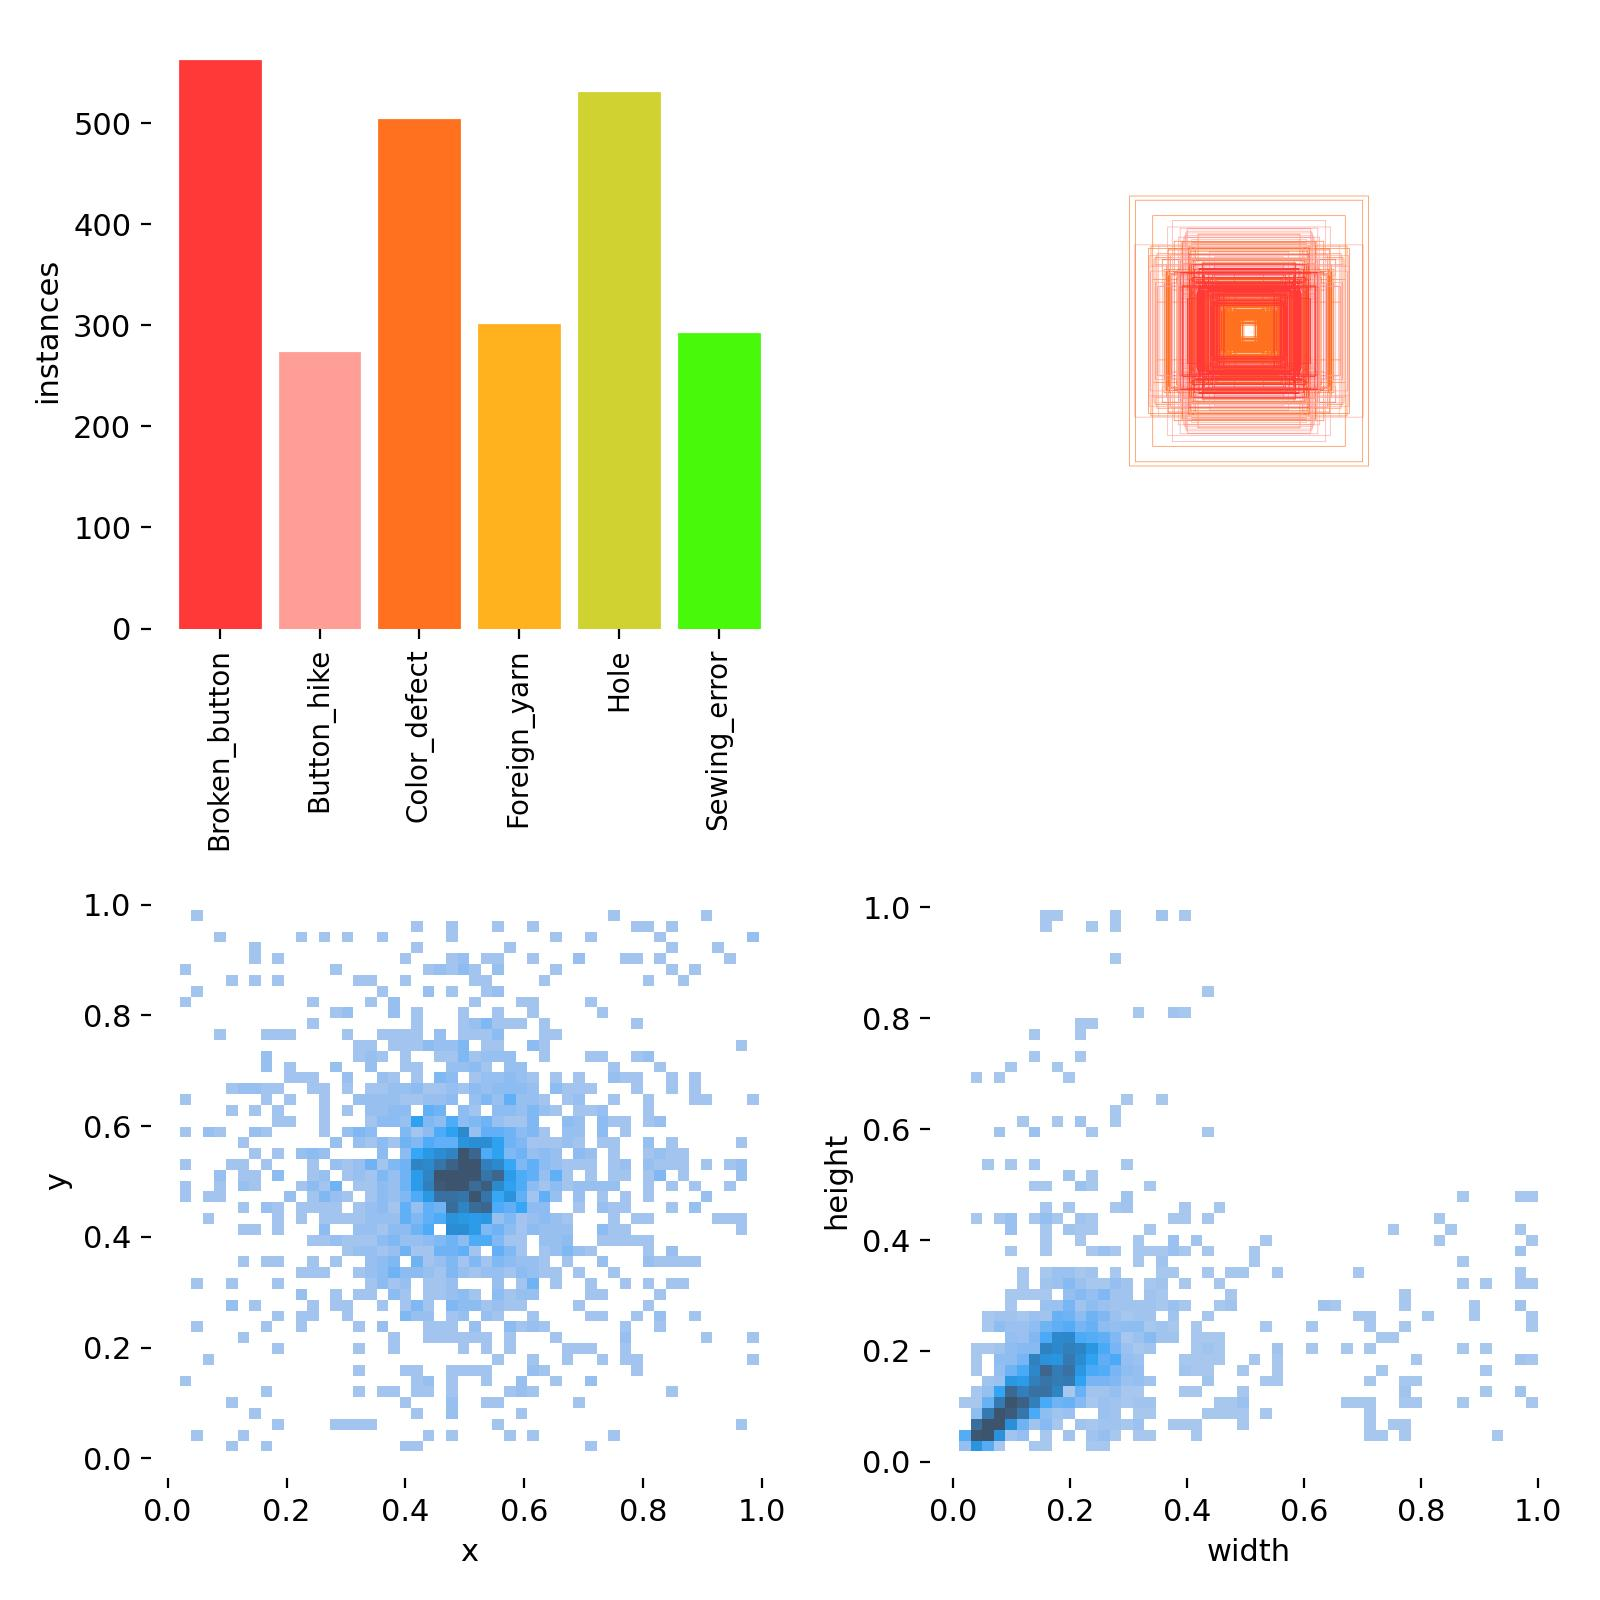

In [10]:
image_path = "/content/runs/obb/train/labels.jpg"
Image(filename=image_path, width=600)

In [11]:
!yolo task=detect mode=val model=/content/runs/obb/train/weights/best.pt data={dataset.location}/data.yaml

WARNING ⚠️ conflicting 'task=detect' passed with 'task=obb' model. Ignoring 'task=detect' and updating to 'task=obb' to match model.
Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-obb summary (fused): 187 layers, 3078389 parameters, 0 gradients, 8.3 GFLOPs
val: Scanning /content/Fabric-Defect-Dataset-1/valid/labels.cache... 202 images, 0 backgrounds, 0 corrupt: 100% 202/202 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 13/13 [00:09<00:00,  1.30it/s]
                   all        202        233      0.898      0.848      0.889      0.626
         Broken_button        202         51       0.96          1      0.983       0.85
           Button_hike        202         25      0.976       0.96      0.991      0.779
          Color_defect        202         46      0.874      0.826      0.893      0.602
          Foreign_yarn        202         29      0.877      0.736      0.82

In [12]:
!yolo task=detect mode=predict model=/content/runs/obb/train/weights/best.pt conf=0.2 source={dataset.location}/test/images

WARNING ⚠️ conflicting 'task=detect' passed with 'task=obb' model. Ignoring 'task=detect' and updating to 'task=obb' to match model.
Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-obb summary (fused): 187 layers, 3078389 parameters, 0 gradients, 8.3 GFLOPs

image 1/103 /content/Fabric-Defect-Dataset-1/test/images/20240424_133555_jpg.rf.7bb25c989fb9db243fa02b7c16d8e13d.jpg: 640x640 14.4ms
image 2/103 /content/Fabric-Defect-Dataset-1/test/images/20240424_133610_jpg.rf.9cfd9b01856bd86d3dc9edf9c6a9ae6b.jpg: 640x640 8.8ms
image 3/103 /content/Fabric-Defect-Dataset-1/test/images/20240424_134359_jpg.rf.0a7417cf7aabe505731394a11729d6aa.jpg: 640x640 8.4ms
image 4/103 /content/Fabric-Defect-Dataset-1/test/images/20240424_134449_jpg.rf.bdce275cda2f6ead63a39199bc3adccd.jpg: 640x640 8.0ms
image 5/103 /content/Fabric-Defect-Dataset-1/test/images/20240424_134707_jpg.rf.bc427efd9498e0b0309ed2feacfbf8c3.jpg: 640x640 7.9ms
image 6/103 /content/Fabric-Defec

In [13]:
import glob
for image_path in glob.glob('/content/runs/obb/predict/*.jpg'):
  display(Image(filename=image_path,width=600))
  print('\n')